# Notebook Environment Setup

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuring-your-Python-Environment" data-toc-modified-id="Configuring-your-Python-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuring your Python Environment</a></span><ul class="toc-item"><li><span><a href="#Python-3.6-or-Later" data-toc-modified-id="Python-3.6-or-Later-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Python 3.6 or Later</a></span></li><li><span><a href="#Creating-a-virtual-environment" data-toc-modified-id="Creating-a-virtual-environment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a virtual environment</a></span></li><li><span><a href="#Using-Requirements.txt" data-toc-modified-id="Using-Requirements.txt-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using Requirements.txt</a></span></li><li><span><a href="#Installing-in-a-Conda-Environment" data-toc-modified-id="Installing-in-a-Conda-Environment-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Installing in a Conda Environment</a></span></li><li><span><a href="#Installing-with---user-option" data-toc-modified-id="Installing-with---user-option-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Installing with --user option</a></span></li><li><span><a href="#Install-Packages-from-this-Notebook" data-toc-modified-id="Install-Packages-from-this-Notebook-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Install Packages from this Notebook</a></span></li></ul></li><li><span><a href="#Creating-your-config.json" data-toc-modified-id="Creating-your-config.json-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating your <code>config.json</code></a></span></li><li><span><a href="#msticpyconfig.yaml-Configuration-File" data-toc-modified-id="msticpyconfig.yaml-Configuration-File-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>msticpyconfig.yaml</code> Configuration File</a></span><ul class="toc-item"><li><span><a href="#Threat-Intelligence-Provider-Setup" data-toc-modified-id="Threat-Intelligence-Provider-Setup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Threat Intelligence Provider Setup</a></span></li><li><span><a href="#Browshot-Setup" data-toc-modified-id="Browshot-Setup-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Browshot Setup</a></span></li><li><span><a href="#Display-existing-msticpyconfig.yaml" data-toc-modified-id="Display-existing-msticpyconfig.yaml-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Display existing <code>msticpyconfig.yaml</code></a></span></li><li><span><a href="#Create-a-new--msticpyconfig.yaml" data-toc-modified-id="Create-a-new--msticpyconfig.yaml-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Create a new  <code>msticpyconfig.yaml</code></a></span></li><li><span><a href="#Edit-an-Existing-msticpyconfig.yaml" data-toc-modified-id="Edit-an-Existing-msticpyconfig.yaml-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Edit an Existing <code>msticpyconfig.yaml</code></a></span></li></ul></li></ul></div>

## Configuring your Python Environment
### Python 3.6 or Later
If you are running in Jupyterhub environment such as Azure Notebooks, Python is already installed. When using any of the sample notebooks or copies of them you only need to ensure that the Python 3.6 (or later) kernel is selected.

If you are running the notebooks locally will you need to install Python 3.6 or later. The Ananconda distribution is a good starting point since it comes with many required packages already installed.

### Creating a virtual environment
If you are running these notebooks locally, it is a good idea to create a clean Python *virtual environment*, before installing any of the packages . This will prevent installed packages conflicting with versions that you may need for other applications.

For standard python use the [`venv`](https://docs.python.org/3/library/venv.html?highlight=venv) command. 
For Conda use the [`conda env`](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) command. 
In both cases be sure to activate the environment before running jupyter using `venvpath/Scripts/activate` or `conda activate {my_env_name}`.


In [ ]:
# Run this cell to view requirements.txt
%pfile requirements.txt

### Installing in a Conda Environment
Although you can use pip inside a conda environment it is usually better to try to install conda packages whenever possible.

```
activate {my_env_name}
conda config --append channels conda-forge
conda install package1 package2
```

See [Managing packages](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html) in Anaconda.

For packages that are not available as conda packages use pip from with a Conda prompt/shell to install the remaining packages.

### Installing with --user option
If you are using a shared installation of Python (i.e. one installed by the administrator) you will need to add the `--user` option to your `pip install` commands. E.g.

```
pip install pkg_name --user --upgrade
```

This will avoid permission errors by installing into your user folder.

> **Note**: the use of the `--user` option is usually not required in a Conda environment 
> since the Python site packages are normally already installed in a per-user folder.

### Install Packages from this Notebook
The first time this cell runs for a new Azure ML or Azure Notebooks notebook or other Python environment it will do the following things:
1. Check the kernel version to ensure that a Python 3.6 or later kernel is running
2. Check the msticpy version - if this is not installed or the version installed is less than the required version (in `REQ_MSTICPY_VER`)
   it will attempt to install a new version (you will be prompted whether you want to do this)
   The install can take several minutes depending on the versions of packages that you already have installed.
   
   > **Note:** These two steps are run from a local python module - this is available in the Azure-Sentinel-Notebooks repo.
   > If you do not have this locally, download it from [here](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/utils/nb_check.py) and
   > put a copy in a `utils` subfolder of your current directory.
  
3. Once *msticpy* is installed and imported, the `init_notebook` function is run. This:
   - imports common modules used in the notebook
   - installs additional packages
   - sets some global options
   
> **Note:** In subsequent runs, this cell shoud run quickly since you will already have the required packages installed.


> **Warning:** you may see some warnings about incompatibility with certain packages. This should not affect the functionality of this notebook but you may need to upgrade the packages producing the warnings to a more recent version.

In [ ]:
from pathlib import Path
import os
import sys
import warnings
from IPython.display import display, HTML, Markdown

REQ_PYTHON_VER=(3, 6)
REQ_MSTICPY_VER=(0, 6, 0)

display(HTML("<h3>Starting Notebook setup...</h3>"))
if Path("./utils/nb_check.py").is_file():
    from utils.nb_check import check_python_ver, check_mp_ver
    check_python_ver(min_py_ver=REQ_PYTHON_VER)
    try:
        check_mp_ver(min_msticpy_ver=REQ_MSTICPY_VER)
    except ImportError:
        !pip install --upgrade msticpy
        if "msticpy" in sys.modules:
            importlib.reload(sys.modules["msticpy"])
        else:
            import msticpy
        check_mp_ver(REQ_MSTICPY_VER)
            
extra_imports = [
    "msticpy.nbtools, observationlist",
    "msticpy.sectools, domain_utils",
    "pyvis.network, Network",
]
# If not using Azure Notebooks, install msticpy with
# !pip install msticpy
from msticpy.nbtools import nbinit
nbinit.init_notebook(
    namespace=globals(),
    extra_imports=["ipwhois, IPWhois"],
    additional_packages=["pyvis", "python-whois"],
);

## Creating your `config.json`
When you start a notebook from Azure Sentinel for the first time it will create a `config.json` file in
your notebooks folder. This should be populated with your workspace and tenant IDs needed to 
authenticate to Azure Sentinel.

If you are using notebooks in a different environment you may need to create a `config.json` or `msticpyconfig.yaml` (see below)
to supply this information to your notebook.

Form more information see this [msticpy Package Configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html)

---

If you need to create or modify your config.json you can run the following cell.

You will need the subscription and workspace IDs for your Azure Sentinel Workspace. These can be found here in the Azure Sentinel portal as shown below.

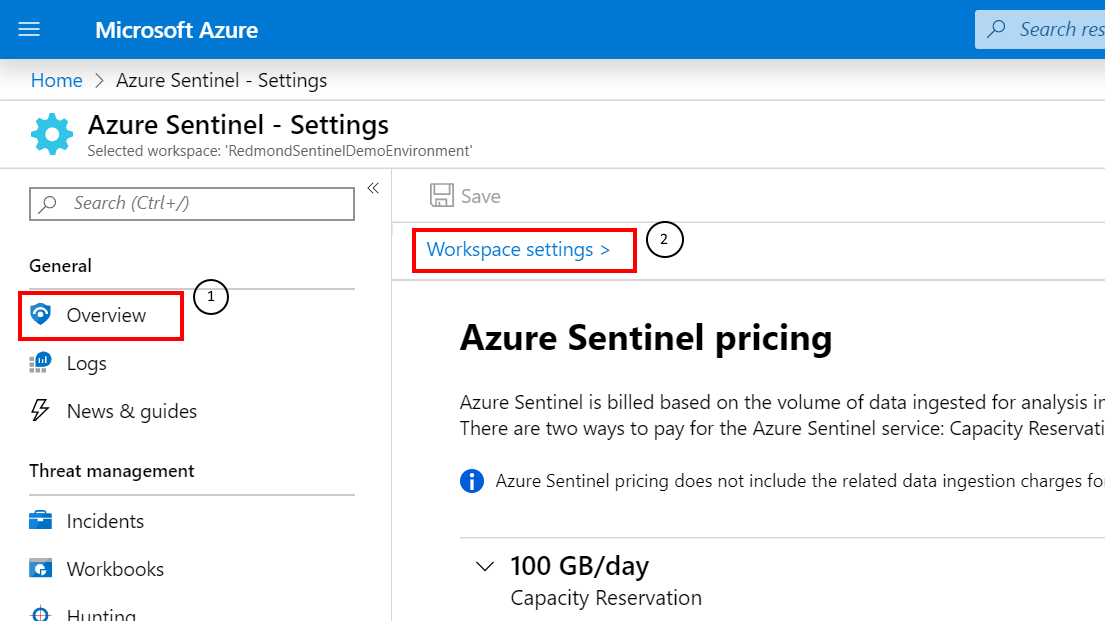

Copy the subscription and workspace IDs:
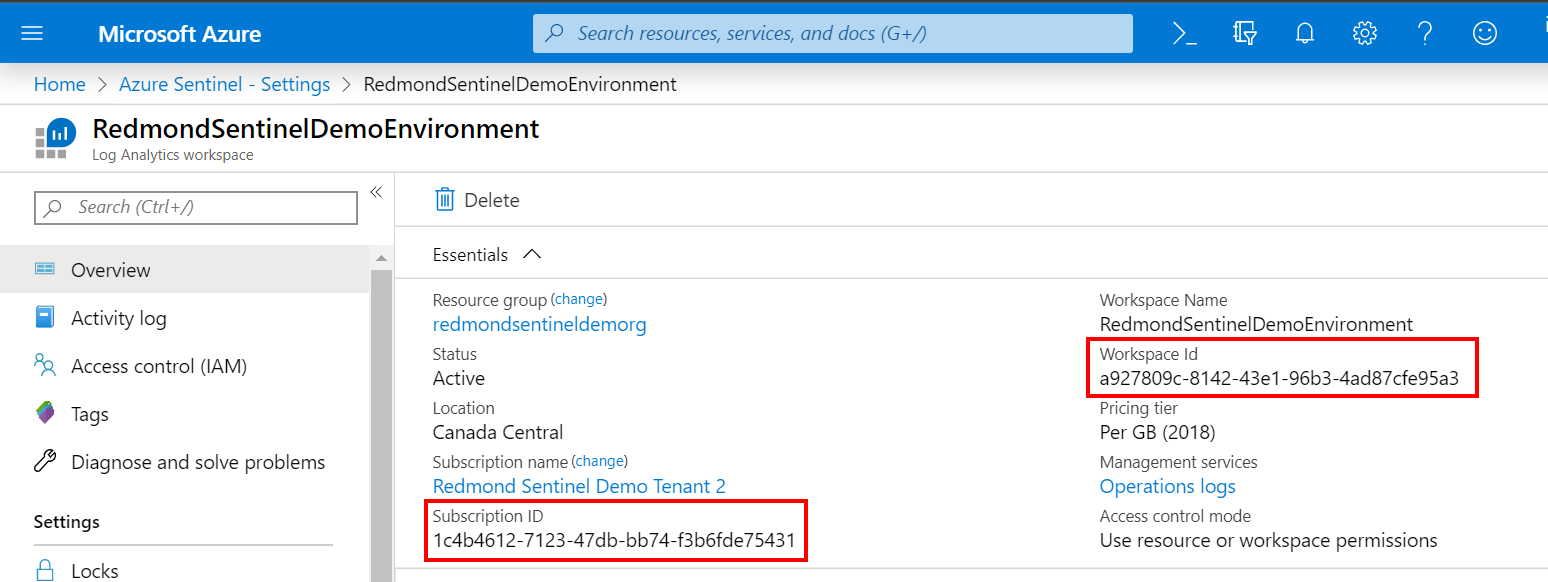

In [4]:
import requests
import json
import ipywidgets as widgets
from pathlib import Path
from datetime import datetime

config_dict = {}


def get_tenant_for_subscription(sub_id):
    aad_url = (
        f"https://management.azure.com/subscriptions/{sub_id}?api-version=2016-01-01"
    )

    resp = requests.get(aad_url)
    if resp.status_code == 401:
        hdr_list = resp.headers["WWW-Authenticate"].split(",")
        hdr_dict = {
            item.split("=")[0].strip(): item.split("=")[1].strip() for item in hdr_list
        }
        return hdr_dict["Bearer authorization_uri"].strip('"').split("/")[3]
    else:
        return None


def save_config_json(file_path, **kwargs):
    if Path(file_path).exists():
        bk_file = (
            str(Path(file_path))
            + ".bak"
            + datetime.now().isoformat(timespec="seconds").replace(":", "-")
        )
        print(f"Exising config found. Saving current config.json to {bk_file}")
        Path(file_path).rename(bk_file)

    with open(file_path, "w") as fp:
        json.dump(kwargs, fp, indent=2)
    print(f"Settings saved config to {file_path}")


def save_config(b):
    tenant = input_tenant.value
    if not tenant:
        tenant = get_tenant_for_subscription(input_wgt["tenant"].value)
        print(f"TenantID found: {tenant_id}")

    save_config_json(
        file_path=input_wgt["path"].value,
        tenant_id=tenant,
        subscription_id=input_wgt["sub_id"].value,
        workspace_id=input_wgt["ws_id"].value,
        workspace_name=input_wgt["workspace"].value,
        resource_group=input_wgt["res_grp"].value,
    )


DEFAULT_CONFIG = "./config.json"
WIDGET_DEFAULTS = {
    "layout": widgets.Layout(width="95%"),
    "style": {"description_width": "200px"},
}

input_wgt = {
    "path": widgets.Text(
        description="Path to config.json", value=DEFAULT_CONFIG, **WIDGET_DEFAULTS
    ),
    "workspace": widgets.Text(
        description="Workspace name", placeholder="Workspace name", **WIDGET_DEFAULTS
    ),
    "sub_id": widgets.Text(
        description="Azure Sentinel Subscription ID",
        placeholder="for example, ef28a760-8c61-41d7-8167-5c8e5d91268b",
        **WIDGET_DEFAULTS,
    ),
    "ws_id": widgets.Text(
        description="Azure Sentinel Workspace ID",
        placeholder="for example, ef28a760-8c61-41d7-8167-5c8e5d91268b",
        **WIDGET_DEFAULTS,
    ),
    "res_grp": widgets.Text(
        description="Resource group", placeholder="Resource group", **WIDGET_DEFAULTS
    ),
    "tenant": widgets.Text(
        description="TenantId", placeholder="Leave blank to look up", **WIDGET_DEFAULTS
    ),
}

if Path(DEFAULT_CONFIG).exists():
    with open(DEFAULT_CONFIG, "r") as fp:
        config_dict = json.load(fp)
    input_wgt["path"].value = DEFAULT_CONFIG
    input_wgt["sub_id"].value = config_dict.get("subscription_id", "")
    input_wgt["ws_id"].value = config_dict.get("workspace_id" "")
    input_wgt["workspace"].value = config_dict.get("workspace_name" "")
    input_wgt["res_grp"].value = config_dict.get("resource_group" "")
    input_wgt["tenant"].value = config_dict.get("tenant_id" "")

save_button = widgets.Button(description="Save config.json file")
save_button.on_click(save_config)

display(widgets.VBox([*(input_wgt.values()), save_button]))

## MSTICPy Configuration File - `msticpyconfig.yaml`

*MSTICPy* is a Python package used in most of the Jupyter notebooks
on Azure-Sentinel-Notebooks. It provides a lot of functionality specific
to threat hunting and investigations, including:
- Data querying against Azure Sentinel tables (also MDE, Splunk and other)
- Threat Intelligence lookups using multiple TI providers (VirusTotal, AlienVault OTX and others)
- Common enrichment functions (GeoIP, IoC extraction, WhoIs, etc.)
- Visualization using event timelines, process trees and Geo-mapping
- Advanced analysis such as Time Series decomposition, Anomaly detection and clustering.

> **Note**: the configuration actions in this section are
> an abbreviated version of the
> [MPSettingsEditor notebook](https://github.com/microsoft/msticpy/blob/master/docs/notebooks/MPSettingsEditor.ipynb)<br>
> Use this notebook for a fuller guide on how to configure your settings.<br>
> Also, see these sections in the *MSTICPy* documentation:<br>
> [MSTICPy Package Configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html)<br>
> [MSTICPy Settings Editor](https://msticpy.readthedocs.io/en/latest/getting_started/SettingsEditor.html)



`config.json` provides some basic configuration for connecting to your Azure Sentinel workspace. 
However, there are many features that require additional configuration information. Some examples are:
- Threat Intelligence Provider connection information
- GeoIP connection information
- Keyvault configuration for storing secrets remotely
- MDE and Azure API connection information.
- Connection information for multiple Azure Sentinel workspaces.

Settings for these are stored in the `msticpyconfig.yaml` file. This file is read from the current directory or you can set an environment variable (`MSTICPYCONFIG`) pointing to its location.
Form more information about *msticpy* configuration see [msticpy Package Configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html).

The most commonly-used sections are described below.


### Threat Intelligence Provider Setup
For more information on the msticpy Threat Intel lookup class see the [documentation here](https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html).

Primary providers are used by default. Secondary providers are not run by default but can be invoked by using the `providers` parameter to `lookup_ioc()` or `lookup_iocs()`. Set the `Primary` config setting to `True` or `False` for each provider ID according to how you want to use them. The `providers` parameter should be a list of strings identifying the provider(s) to use. 

- The provider ID is given by the `Provider:` setting for each of the TI providers - do not alter this value.
- Delete or comment out the section for any TI Providers that you do not wish to use.
- For most providers you will usually need to supply an authorization (API) key and in some cases a user ID for each provider.
- For the Azure Sentinel TI provider, you will need the workspace ID and tenant ID and will need to authenticate in order 
  to access the data (although if you have an existing authenticated connection with the same workspace/tenant, this connection will be re-used).

### GeoIP Providers
Like the TI providers these services normally need an API key to access. You can read more about configuration
the supported providers here. [msticpy GeoIP Providers](https://msticpy.readthedocs.io/en/latest/data_acquisition/GeoIPLookups.html)

### Browshot Setup
The functionality to screenshot a URL in msticpy.sectools.domain_utils relies on a service called BrowShot (https://browshot.com/). An API key is required to use this service and it needs to be defined in the `msticpyconfig` file as well. As this is not a threat intelligence provider it doesn't not fall under the `TIProviders` section of `msticpyconfig` but instead sits alone. See the cell below for example configuration.

### Display your existing `msticpyconfig.yaml`

We'll be using some of the *MSTICPy* configuration tools:
*MPConfigEdit* and *MPConfigFile*, so we'll import these first

In [ ]:
from msticpy.config import MpConfigFile, MpConfigEdit, MpConfigControls
from msticpy.nbtools import nbwidgets
from msticpy.common import utility as utils

Then run MpConfig file to view your current settings.

In [ ]:
mpconfig = MpConfigFile()
mpconfig.load_default()
mpconfig.view_settings()

#### If you see nothing but a pair of curly braces...
...in the settings view above it means
that you probably need to create up a **msticpyconfig.yaml**

If you know that you have configured a msticpyconfig file, 
you can search for this file using MpConfigFile. Click on **Load file**. 
Once you've done that go to the [Setting the path to your msticpyconfig.yaml](#Setting-the-path-to-your-msticpyconfig.yaml)

### Import your Config.json and create a msticpyconfig.yaml [Azure Sentinel]

Follow these steps:
1. Run MpConfigFile
2. Locate your config.json
   - click **Load file** button
   - Browse - use the controls to navigate to find config.json
   - Search - set the starting directory to search and open the **Search** drop-down
   - When you see the file click on it and click **Select File** button (below the file browser)
   - optionally, click **View Settings** to confirm that this looks right
3. Convert to convert to msticpyconfig format
   - click **View Settings**
4. Save your `msticpyconfig.yaml` file
   - type a path into the **Current file** text box
   - Click on **Save file**
5. You can set this file to always load by assigning the path to an environment variable.
   See [Setting the path to your msticpyconfig.yaml](#Setting-the-path-to-your-msticpyconfig.yaml)

### Setting the path to your msticpyconfig.yaml

This is a good point to set up an environment variable so that
you can keep a single configuration file in a known location and always
load the same settings. (Of course, you're free to use multiple configs
if you need to use different settings for each notebook folder)

- decide on a location for your `msticpyconfig.yaml` - this could be in "~/.msticpyconfig.yaml" or "%userprofile%/msticpyconfig.yaml"
- copy the `msticpyconfig.yaml` file that you just created to this location.
- set the `MSTICPYCONFIG` environment variable to point to that location:

#### Windows
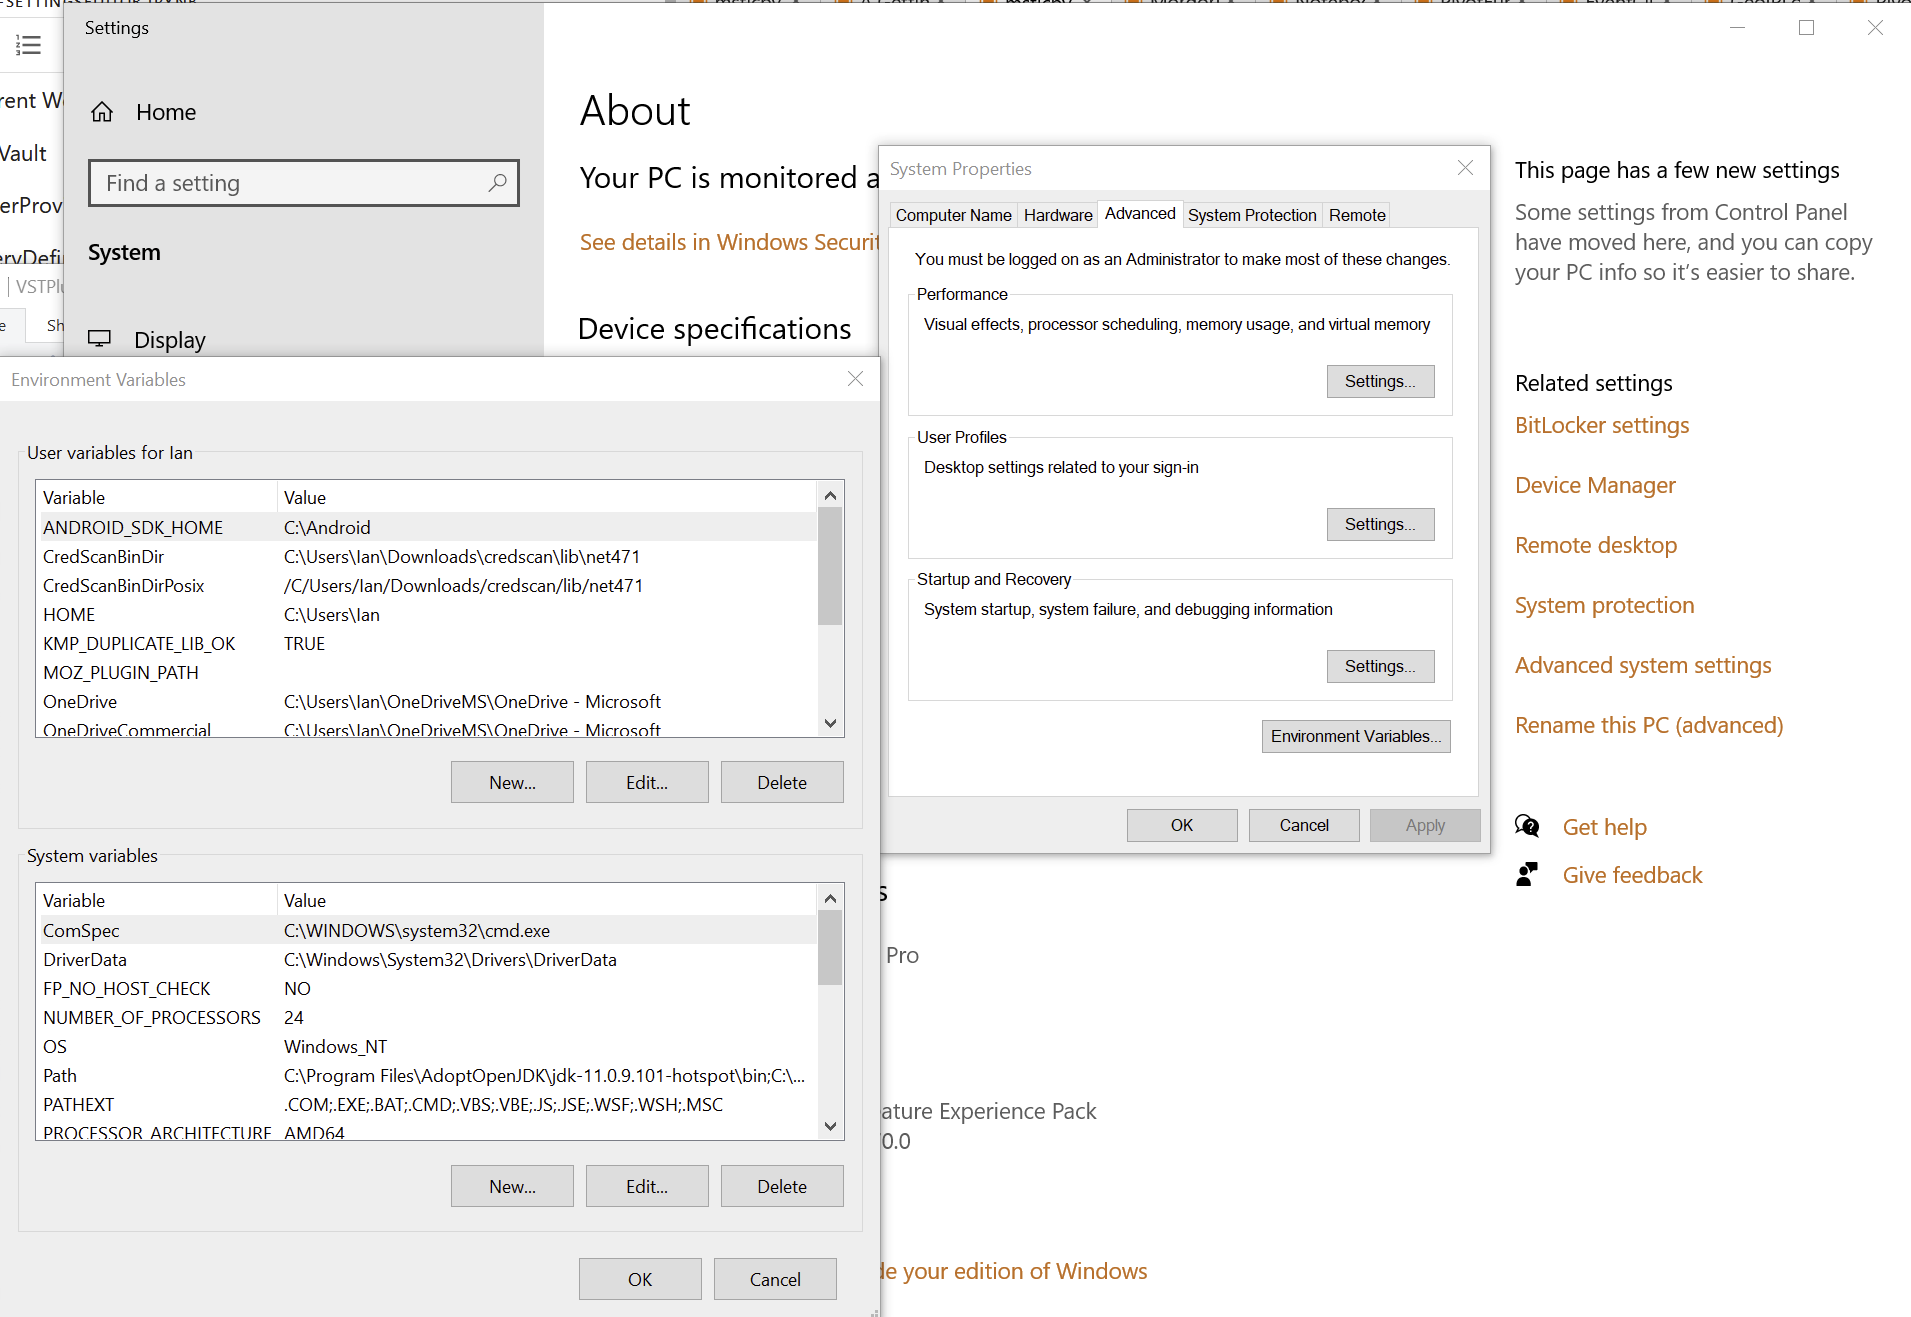

#### Linux
In your .bashrc (or somewhere else convenient) add:

`export MSTICPYCONFIG=~/.msticpyconfig.yaml`

#### Azure ML

In Azure ML, you need to decide whether to store your `msticpyconfig.yaml` in
the AML file store or on the Compute file system. If you have any secret
key material in the file, we recommend storing on the Compute instance, since
the AML file store is shared storage, whereas the Compute instance is
accessible only by the user who created it.

1. Open a terminal<br>
  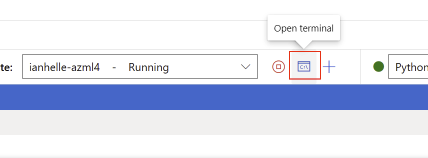
  
  Your current directory should be your AML file store home directory
  (this is mounted in the Compute Linux system) and the prompt will look something like this
  ```bash
  azureuser@ianhelle-azml4:~/cloudfiles/code/Users/ianhelle$
  ```
  <br>
  
2. If you created a `msticpyconfig.yaml` in the previous step, this
   should be visible if you type `ls`.
   
3. If you want to move this file to the Compute filestore type:<br>
   ```bash
   mv msticpyconfig.yaml ~
   ```
   <br>
4. Add an environent variable to point to the `msticpyconfig.yaml` location.<br>
   Use `vi/vim` or `nano` to edit your .bashrc file:<br>
   
   **vim**
   
   ```bash
   vim ~/.bashrc
   ```
   Commands
   - go to end of file: `Shift-G` followed by `End`
   - create a new line: `a` followed by `Return`
   - type in the relevant line from step 5
   - press `Esc` to get back to command mode
   - save the file: type `:wq`
   <br>
   
   **nano**
   
   ```bash
   nano ~/.bashrc
   ```
   Commands
   - go to end of file: `Alt+/` or `Option+/`
   - type in the relevant line from step 5
   - save the file: `Ctrl+x` followed by `Y`
   
   <br>
5. Add the following line, depending on whether you moved the file to
   the home directory (first line) or not (second line)<br>
   ```bash
   export MSTICPYCONFIG=~/msticpyconfig.yaml
   ```
   ```bash
   export MSTICPYCONFIG=~/cloudfiles/code/Users/YOURNAME/msticpyconfig.yaml
   ```
   (replace `YOURNAME` with your user name - from the prompt in step 1)


### Verify (or add) Azure Sentinel Workspace settings

If you loaded a config.json file you should see your workspace displayed. If not,
you can add one or more workspaces here. The Name, WorkspaceId and TenantId are
mandatory. The other fields are helpful but not essential.

Use the Help drop-down panel to find more information about adding workspaces and finding
the correct values for your workspace.

If this the workspace that you use frequently or all of the time, you may want to set this as the **default.**
This creates a duplicate entry named "Default". This is used when you connect to AzureSentinel without
needing to supply a workspace name. You can override this by specifying a workspace name at connect time,
which you need to do if you are working with multiple workspaces.

When you've finished, type a file name (usually "msticpyconfig.yaml") into the **Conf File** text box
and click **Save File**,

You can also try the **Validate Settings** button. This should show that you have a few missing
sections (we'll fill these in later) but should show nothing under the the "Type Validation Results".

In [ ]:
mpedit = MpConfigEdit(settings=mpconfig)
mpedit.set_tab("AzureSentinel")
mpedit

### Adding Threat Intel (TI) Providers

You will likely want to do lookups of IP Addresses, URLs and other items to check for any Threat Intelligence reports.
To do that you need to add the providers that you want to use. Most TI providers require that you
have an account with them and supply an API key or other authentication items when you connect.

Most providers have a free use tier (or in cases like AlienVault OTX) are entirely free.
Free tiers for paid providers usually impose a certain number of requests that you
can make in a given time period.

For account creation, each provider does this slightly differently.
Use the help links in the editor help to find where to go set each of these up.

Assuming that you have done this, we can configure a provider. Be sure to
store any authentication keys somewhere safe (and memorable).

We are going to use [VirusTotal](https://www.virustotal.com) (VT) as an example TI Provider.
For this you will need a VirusTotal API key from the 
[VirusTotal](https://developers.virustotal.com/v3.0/reference#getting-started) website.<br>
We also support a range of other threat intelligence providers - you can read about this here [MSTICPy TIProviders](https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html)
<br><br>
Taking VirusTotal as our example.
- Click on the **TI Providers** tab
- Select "VirusTotal" from the **New prov** drop-down list
- Click **Add**

This should show you the values that you need to provide:
- a single item **AuthKey** (this is usually referred to as an "API Key"

You can paste the key into the **Value** field and click the **Save** button.

You can opt to store the VT AuthKey as an environment variable. This is a bit more secure than 
having it laying around in configuration files.
Assuming that you have set you VT key as an environment variable
```bash
set VT_KEY=VGhpcyBzaG91bGQgc2hvdyB5b3UgdGhlIHZhbHVlcyB  (Windows)
export VT_KEY=VGhpcyBzaG91bGQgc2hvdyB5b3UgdGhlIHZhbHVlcyB  (Linux/MAC)
```
Flip the **Storage** radio button to **EnvironmentVar** and type the name of the
variable (`VT_KEY` in our example) into the value box.

You can also use Azure Key Vault to store secrets like these but we will need to 
set up the Key Vault settings before this will work.

Click the **Save File** button to save your changes.

In [ ]:
mpedit.set_tab("TI Providers")
mpedit

### Adding GeoIP Providers

MSTICPy supports two Geo IP providers - Maxmind GeoIPLite and IP Stack.
The main difference between the two is that Maxmind downloads and uses a local
database, while IPStack is a purely online solution.

For either you need API keys to either download the free database from MaxMind
or access the IPStack online lookup

We'll use GeoIPLite as our example.
You can sign up for a free account and API key at https://www.maxmind.com/en/geolite2/signup.
You'll need the API for the following steps.
- Select "GeoIPLite" from the **New Prov**
- Click **Add**
- Paste your Maxmind key into the **Value** field

Set the maxmind data folder:
- This defaults to "~/.msticpy"
  - On Windows this translates to the foldername `%USERPROFILE%/.msticpy`.
  - On Linux/Mac this translates to the folder `.msticpy` in your home folder.
- This is where the downloaded GeopIP database will be stored.
- Choose another folder name and location if you prefer.

> **Note**: as with the TI providers you can opt to store your key
> as an environment variable or keep it in Key Vault.


In [ ]:
mpedit.set_tab("GeoIP Providers")
mpedit

<h2 style='color:red'>Important Security Note</h2>

> You might not be too comfortable leaving API keys stored in
> text files. You can opt to have these settings stored either:
> - as Environment Variables
> - in Azure Key Vault

To see how to do this see these resources
- [MPSettingsEditor notebook](https://github.com/microsoft/msticpy/blob/master/docs/notebooks/MPSettingsEditor.ipynb)<br>
- [MSTICPy Package Configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html)<br>
- [MSTICPy Settings Editor](https://msticpy.readthedocs.io/en/latest/getting_started/SettingsEditor.html)


### Optional Settings 1 - Azure Data and Azure Sentinel APIs

### Azure API and Azure Sentinel API
To access Azure APIs (such as the Sentinel APIs or Azure resource APIs) 
you need to be able to use Azure Authentication.
The setting is named "AzureCLI" for historical reasons - don't let that confuse you.
We currently support two ways of authenticating:
1.  Chained chained authentication (recommended)
2.  With a client app ID and secret

The former can try up to four methods of authentication:
- Using creds set in environment variables
- Using creds available in an AzureCLI logon
- Using the Managed Service Identity (MSI) credentials of the machine you are
  running the notebook kernel on
- Interactive browser logon

To use chained authentication methods select the methods to want to use and leave
the clientId/tenantiId/clientSecret fields empty.


In [ ]:
mpedit.set_tab("Data Providers")
mpedit

### Optional Settings 2 - Autoload QueryProviders

This section controls which, if any query providers you want to load automatically
when you run `nbinit.init_notebook`.

This can save a lot of time if you are frequently authoring new notebooks. It also
allows the right providers to be loaded before other components that might use them such as
- Pivot functions
- Notebooklets
(more about these in the next section)

There are two types of provider support:
- Azure Sentinel - here you specify both the provider name and the workspace name that you want to connect to.
- Other providers - for other query providers, just specify the name of the provider.

Available Azure Sentinel workspaces are taken from the items you configured in the **Azure Sentinel** tab.
Other providers are taken from the list of available provider types in *MSTICPy*.

There are two options for each of these:
- **connect** - if this is True (checked) *MSTICPy* will try to authenticate to the
  provider backend immediately after loading. This assumes that you've configured
  credentials for the provider in your settings.
  Note: if this is not set it defaults to True.
- **alias** - when MSTICPy loads a provider it assigns it to a Python variable name.
  By default this is "qry_*workspace_name*" for Azure Sentinel providers and
  "qry_*provider_name*" for other providers. If you want to use something a bit shorter
  and easier to type/remember you can add a *alias*. The variable name created
  will be "qry_*alias*"
  
> **Note** if you lose track of which providers have been loaded by
> this mechanism they are added to the `current_providers` attribute of
> `msticpy`
```python
   import msticpy
   msticpy.current_providers
```

In [ ]:
mpedit.set_tab("Autoload QueryProvs")
mpedit

### Optional Settings 3 - Autoloaded Component
This section controls which, if other components you want to load automatically
when you run `nbinit.init_notebook()`.

This includes
- TILookup - the Threat Intel provider library
- GeopIP - the Geo ip provider that you want to use
- AzureData - the module used to query details about Azure resources
- AzureSentinelAPI - the module used to query the Azure Sentinel API
- Notebooklets - loads notebooklets from the [msticnb package](https://msticnb.readthedocs.io/en/latest/)
- Pivot - pivot functions

These are loaded in this order, since the Pivot component needs query and other providers
loaded in order to find the pivot functions that it will attach to entities.
For more information see [pivot functions](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html)

Some components do not require any parameters (e.g. TILookup and Pivot). Others do support or require additional
settings:

**GeoIpLookup**

You must type the name of the GeoIP provider that you want to use - either "GeoLiteLookup" or "IPStack"

**AzureData** and **AzureSentinelAPI**
- **auth_methods** - override the default settings for AzureCLI and connect using the selected methods
- **connnect** - set to false to load but not connect

**Notebooklets**

This has a single parameter block **AzureSentinel**. At minumum you
should specify the workspace name. This needs to be in the following
format:
```
    workspace:WORKSPACENAME
```
WORKSPACENAME must be one of the workspaces defined in the Azure Sentinel tab.

You can also add addition parameters to send to the notebooklets init function:
Specify these as addition key:value pairs, separated by newlines.
```
    workspace:WORKSPACENAME
    providers=["LocalData","geolitelookup"]
```
See the 
[msticnb `init` documentation](https://msticnb.readthedocs.io/en/latest/msticnb.html#msticnb.data_providers.init)
for more details


In [ ]:
mpedit.set_tab("Autoload Components")
mpedit

## Save your file and add the MSTICPYCONFIG environment variable

Save your file, and, if you haven't yet done so, create an
enviroment variable to point to it. See [Setting the path to your msticpyconfig.yaml](#Setting-the-path-to-your-msticpyconfig.yaml)

## Validating your `msticpyconfig.yaml` settings

MpConfigFile includes a validation function that can help
you diagnose setup problems.

You can run this interactively or from Python.

The examples below assume that you have set `MSTICPYCONFIG` to point
to you config file. If not, you will need to use the `load_from_file()`
function (or Load File button) to load the file before validating.

In [ ]:
mpconfig = MpConfigFile()
mpconfig.load_default()
mpconfig.validate_settings()

To validate interactively:

In [ ]:
mpconfig = MpConfigFile()
mpconfig.load_default()
mpconfig